#### 1. Реализуйте бинарный поиск


In [1]:
import random
import timeit

In [2]:
def binary_search(num, data):
#     print(num)
#     print(data)
    data.sort()
#     print(data)
    i_min = 0
    i_max = len(data)-1
#     i_mid = (i_max + i_min)//2
    n_op = 0
    
    while i_min <= i_max:
        n_op += 1
        i_mid = (i_max + i_min)//2
        
        if num > data[i_mid]:
            i_min = i_mid+1
#             i_mid = i_min + (i_max - i_min)%2
        elif num < data[i_mid]:
            i_max = i_mid-1       
        else:
            break
#             return i_mid
#             i_mid = i_min + (i_max - i_min)%2            
            
    print(f'n operations = {n_op}')
    print(data)
    print(f'i_mid = {i_mid}, num = {num}, data[i_mid] = {data[i_mid]}')
    return i_mid


In [3]:
list10 = [random.randint(0,10) for _ in range(10)]
list100 = [random.randint(0,100) for _ in range(100)]
list1000 = [random.randint(0,1000) for _ in range(1000)]

In [4]:
binary_search(random.randint(0,100), list10)


n operations = 4
[1, 2, 3, 3, 4, 7, 8, 8, 10, 10]
i_mid = 9, num = 93, data[i_mid] = 10


9

#### 2. Реализуйте несколько алгоритмов сортировки и сравните их время работы на одних и тех же входных данных

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np
import random

%matplotlib inline

# Enable interactive plot
%matplotlib notebook

In [6]:
LOW_LIMIT = -20
UP_LIMIT = 20

test_array = [_ for _ in range(LOW_LIMIT, UP_LIMIT)]
random.shuffle(test_array)
print(f'input: {test_array}')

input: [13, 17, -19, -1, 16, -15, 5, -17, -3, 2, 19, 10, 4, -14, 9, -4, -9, -2, -8, -7, 14, -6, 6, 0, 1, -13, 12, -5, -16, -10, -11, 11, 3, 18, 7, -12, -18, 8, -20, 15]


## сортировка пузырьком

In [7]:
# def sort_bubble_invert(array):
# #     step = 1
#     for i in range(len(array)-1, -1, -1):
#         for j in range(len(array)-1, len(array)-i-1, -1):
#             if array[j] < array[j-1]:
#                 array[j], array[j-1] = array[j-1], array[j]
#         # print(f'step {step} : A[i] = {array[i]} {array}')
#         # step += 1

arrays = [] 
arrays.append((0,test_array.copy()))
def sort_bubble(array):
    step = 1
    for i in range(len(array)):
        for j in range(len(array)-1-i):#, len(array)):
            if array[j+1] < array[j]:
                array[j+1], array[j] = array[j], array[j+1]  
                arrays.append((j, array.copy()))
                            
#         print(f"step {step} : A[i] = {array[i]}\t {array}")
        step += 1

                
                
# sort_bubble_invert(test_array)
test_array2=test_array.copy()
sort_bubble(test_array2)
print(f'output: {test_array2}\n')
# for r in arrays:
#     print(r)

output: [-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]



<IPython.core.display.Javascript object>


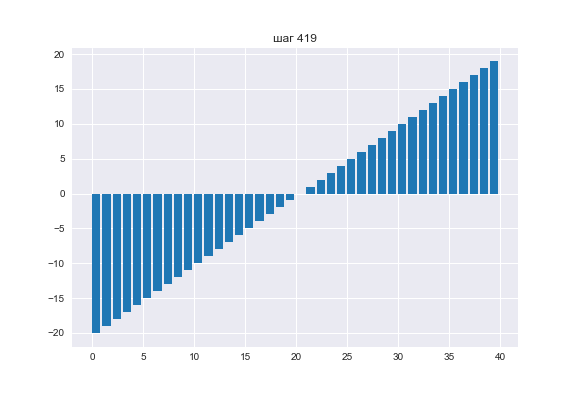

In [10]:
fig=plt.figure()
barcollection = plt.bar(range(len(arrays[0][1])), arrays[0][1], align='edge', color='tab:blue')
plt.style.use("seaborn")

def animate(k):
    array = arrays[k][1]
    plt.title(f'шаг {k}')
    
    for i in range(len(barcollection)):
        barcollection[i].set_height(array[i])
#         barcollection[i].set_color('tab:blue')
#         barcollection[index-1].set_color('tab:red')
        
#         if i == index:
#             barcollection[index].set_color('tab:red')
#         else:
#             barcollection[index].set_color('tab:blue')
        

n_frames = len(arrays)

anim=animation.FuncAnimation(fig,animate, 
                             repeat=False,
                             blit=False,
                             frames=n_frames,
                             interval=10)

plt.show()

## Сортировка слиянием

In [11]:
step = 0

def merge_sort(array):
    #     print(array)
    if len(array) <= 1:
        return array
    else:
        mid = len(array) // 2
        l_copy = merge_sort(array[:mid])
        r_copy = merge_sort(array[mid:])

        result = []
        l_index = 0
        r_index = 0
        while l_index < len(l_copy) and r_index < len(r_copy):
            if l_copy[l_index] < r_copy[r_index]:
                result.append(l_copy[l_index])
                l_index += 1
            else:
                result.append(r_copy[r_index])
                r_index += 1

        while l_index < len(l_copy):
            result.append(l_copy[l_index])
            l_index += 1

        while r_index < len(r_copy):
            result.append(r_copy[r_index])
            r_index += 1

        # print(f'return result = {result}')

        print(result)
        return result

print(test_array)
res = merge_sort(test_array)
print(f'out: {res}')

[13, 17, -19, -1, 16, -15, 5, -17, -3, 2, 19, 10, 4, -14, 9, -4, -9, -2, -8, -7, 14, -6, 6, 0, 1, -13, 12, -5, -16, -10, -11, 11, 3, 18, 7, -12, -18, 8, -20, 15]
[13, 17]
[-1, 16]
[-19, -1, 16]
[-19, -1, 13, 16, 17]
[-15, 5]
[-3, 2]
[-17, -3, 2]
[-17, -15, -3, 2, 5]
[-19, -17, -15, -3, -1, 2, 5, 13, 16, 17]
[10, 19]
[-14, 9]
[-14, 4, 9]
[-14, 4, 9, 10, 19]
[-9, -4]
[-8, -7]
[-8, -7, -2]
[-9, -8, -7, -4, -2]
[-14, -9, -8, -7, -4, -2, 4, 9, 10, 19]
[-19, -17, -15, -14, -9, -8, -7, -4, -3, -2, -1, 2, 4, 5, 9, 10, 13, 16, 17, 19]
[-6, 14]
[0, 1]
[0, 1, 6]
[-6, 0, 1, 6, 14]
[-13, 12]
[-16, -10]
[-16, -10, -5]
[-16, -13, -10, -5, 12]
[-16, -13, -10, -6, -5, 0, 1, 6, 12, 14]
[-11, 11]
[7, 18]
[3, 7, 18]
[-11, 3, 7, 11, 18]
[-18, -12]
[-20, 15]
[-20, 8, 15]
[-20, -18, -12, 8, 15]
[-20, -18, -12, -11, 3, 7, 8, 11, 15, 18]
[-20, -18, -16, -13, -12, -11, -10, -6, -5, 0, 1, 3, 6, 7, 8, 11, 12, 14, 15, 18]
[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0